# **Scikit Learn - Basics**

scikit-learn은 지도 및 비지도 학습을 지원하는 오픈소스 기계 학습 라이브러리입니다.<br>또한 모델 피팅, 데이터 사전 처리, 모델 선택 및 평가, 기타 여러 유틸리티를 위한 다양한 도구를 제공합니다.
<br><br>[scikit-learn.org](https://scikit-learn.org/stable/getting_started.html)
여기에서는 scikit-learn을 시작하는 방법에 대한 기본 사항과 이후 세션에서 접하게 될 몇 가지 용어를 살펴보겠습니다. 아래 코드를 실행해 보세요!
현재 scikit-learn 또는 기계 학습 워크플로의 정확한 작동을 이해하지 못한다고 걱정하지 마세요. 아래 코드는 지금까지 노트북에서 본 모든 것을 보여줍니다! 이후 세션에서 우리는 그 과정을 단계별로 더 자세히 살펴볼 것입니다.

In [1]:
# Anaconda의 conda나 다른 환경의 Python에서 pip를 사용하여 scikit-learn를 설치하려면 따옴표를 제거하세요.
!pip install scikit-learn
'''
pip install scikit-learn
#or
conda install scikit-learn
'''

'\npip install scikit-learn\n#or\nconda install scikit-learn\n'

먼저 sklearn을 import 하고 print를 이용하여 정상적으로 import 되었는지 확인할 수 있습니다. 라이브러리를 올바르게 가져오지 않으면 오류가 발생합니다.


In [2]:
# sklearn 라이브러리 가져오기
import sklearn
print(sklearn.__version__)

1.4.2


다음으로 예제에 필요한 종속성을 가져옵니다. 이 예에서 우리는 Decision Tree의 시각화를 보여주기 위해서 DecisionTreeClassifier와 나중에 시각화에 도움이 될 플롯 트리를 가져올 것입니다.

In [4]:
# numpy, pandas, matplotlib.pyplot, DecisionTreeClassifier 및 plot_tree 가져오기
# 이 부분은 나중에 보게 될 예제와 유사합니다!
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Scikit-Learn에서 유방암 데이터 세트 가져오기
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(type(data))
data


<class 'sklearn.utils._bunch.Bunch'>


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
list(data.target_names)  # 악성의, 양성의

['malignant', 'benign']

In [6]:
print(data.target)
print(data.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

마지막으로, max_depth 인수를 통해 트리의 최대 레벨 수를 지정합니다. 그리고 데이터 셋을 이용하여 적합 함수로 모델을 학습시키고, 플롯 트리를 사용하여 시각화합니다.

1. gini(지니 불순도, Gini impurity)
   - 정의 : 지니 불순도는 특정 노드에서 클래스들이 얼마나 섞여 있는지를 나타내는 지표. 해당 노드의 데이터들이 얼마나 한가지 클래스로 잘 분류되었는지 측정
   - 0~0.5. 0은 완벽, 0.5는 모든 클래스 비율이 동일하게 섞여있다.
2. samples(샘플 수, Number of Samples)
   - 해당 노드에 속한 샘플의 총 개수
   - 노드 트리의 하위 레벨로 내려갈수록 샘플 수는 줄어든다.
3. value : 해당 노드에 속한 각 클래스별 샘플 수
4. class : 해당 노드에서 가장 많은 샘플 수를 가진 클래스

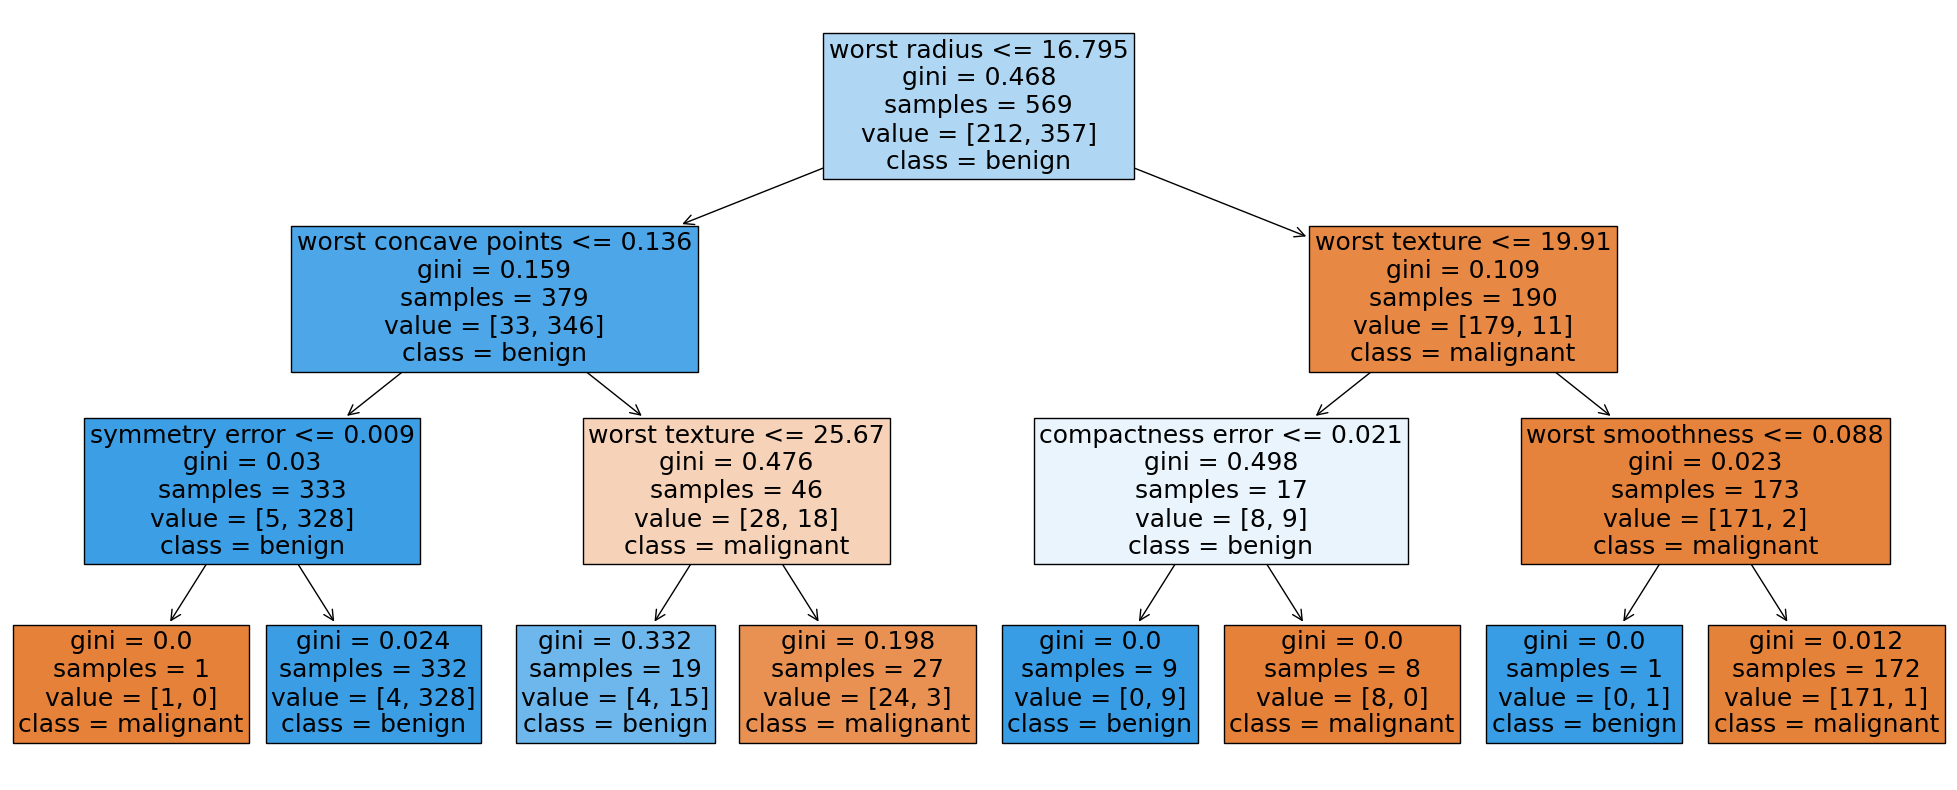

In [9]:
# 여기에서 데이터 세트를 모델에 전달하고 트리의 시각화하여 그래프로 나타냅니다.
clf = DecisionTreeClassifier(max_depth=3) # max_depth는 트리의 최대 레벨 수입니다.
clf.fit(data.data, data.target)

plt.figure(figsize=(25,10))
a = plot_tree(clf,
              feature_names=data.feature_names,
              class_names=data.target_names,
              filled=True,
              fontsize=18)